# Building your Deep Neural Network: Step by Step

Trong b√†i t·∫≠p n√†y, c√°c b·∫°n s·∫Ω h·ªçc c√°ch t·ª´ng b∆∞·ªõc c√†i ƒë·∫∑t m·ªôt Deep Neural Network.

**Sau b√†i t·∫≠p n√†y, c√°c b·∫°n c√≥ th·ªÉ:**
- S·ª≠ d·ª•ng non-linear units nh∆∞ ReLU ƒë·ªÉ c·∫£i thi·ªán m√¥ h√¨nh
- X√¢y d·ª±ng m·ªôt deeper neural network (c√≥ nhi·ªÅu h∆°n 1 hidden layer)
- C√†i ƒë·∫∑t m·ªôt l·ªõp neural network d·ªÖ s·ª≠ d·ª•ng (c√≥ th·ªÉ t√πy ch·ªânh c√°c si√™u tham s·ªë)

**Notation**:
- Superscript $[l]$ ch·ªâ nh·ªØng th·ª© g·∫Øn li·ªÅn v·ªõi $l^{th}$ layer. 
    - V√≠ d·ª•: $a^{[L]}$ l√† $L^{th}$ layer activation. $W^{[L]}$ v√† $b^{[L]}$ l√† nh·ªØng tham s·ªë c·ªßa $L^{th}$ layer. ($L$ l√† layer cu·ªëi c√πng)
- Superscript $(i)$ ch·ªâ nh·ªØng th·ª© g·∫Øn li·ªÅn v·ªõi d·ªØ li·ªáu hu·∫•n luy·ªán th·ª© $i^{th}$ trong t·∫≠p hu·∫•n luy·ªán. 
    - V√≠ d·ª•: $x^{(i)}$ l√† d·ªØ li·ªáu hu·∫•n luy·ªán th·ª© $i^{th}$.
- Lowerscript $i$ ch·ªâ ph·∫ßn t·ª≠ th·ª© $i^{th}$ c·ªßa m·ªôt vector.
    - V√≠ d·ª•: $a^{[l]}_i$ ch·ªâ ph·∫ßn th·ª≠ th·ª© $i^{th}$ c·ªßa vector c·ªôt activation $a^{[l]}$ (c·ªßa $l^{th}$ layer).



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1 - Packages



In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#from LlayerTestCases import *

!pip install LlayerTestCases
#from dnn_utils import sigmoid, sigmoid_backward, relu, relu_backward

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement LlayerTestCases (from versions: none)
ERROR: No matching distribution found for LlayerTestCases


## 2 - Gi·ªõi thi·ªáu t·ªïng qu√°t v·ªÅ Assignment

Trong b√†i t·∫≠p n√†y, Neural Network c√≥ L layer. ·ªû L-1 layer ƒë·∫ßu ti√™n ta s·∫Ω d√πng ReLU activation function, ·ªü output layer (ch√≠nh l√† layer L) ta s·∫Ω d√πng sigmoid activation function.

M√¥ h√¨nh ƒë∆∞·ª£c m√¥ t·∫£ qua h√¨nh d∆∞·ªõi ƒë√¢y. ·ªû L-1 layer ƒë·∫ßu ti√™n ta d√πng ReLU activation function n√™n ·ªü chi·ªÅu forward ta c√≥ L-1 b∆∞·ªõc Linear ReLU forward v√† 1 b∆∞·ªõc Linear Sigmoid forward. T∆∞∆°ng t·ª± ·ªü chi·ªÅu backward ta c√≥ 1 b∆∞·ªõc Linear Sigmoid backward v√† L-1 b∆∞·ªõc Linear ReLU backward. 


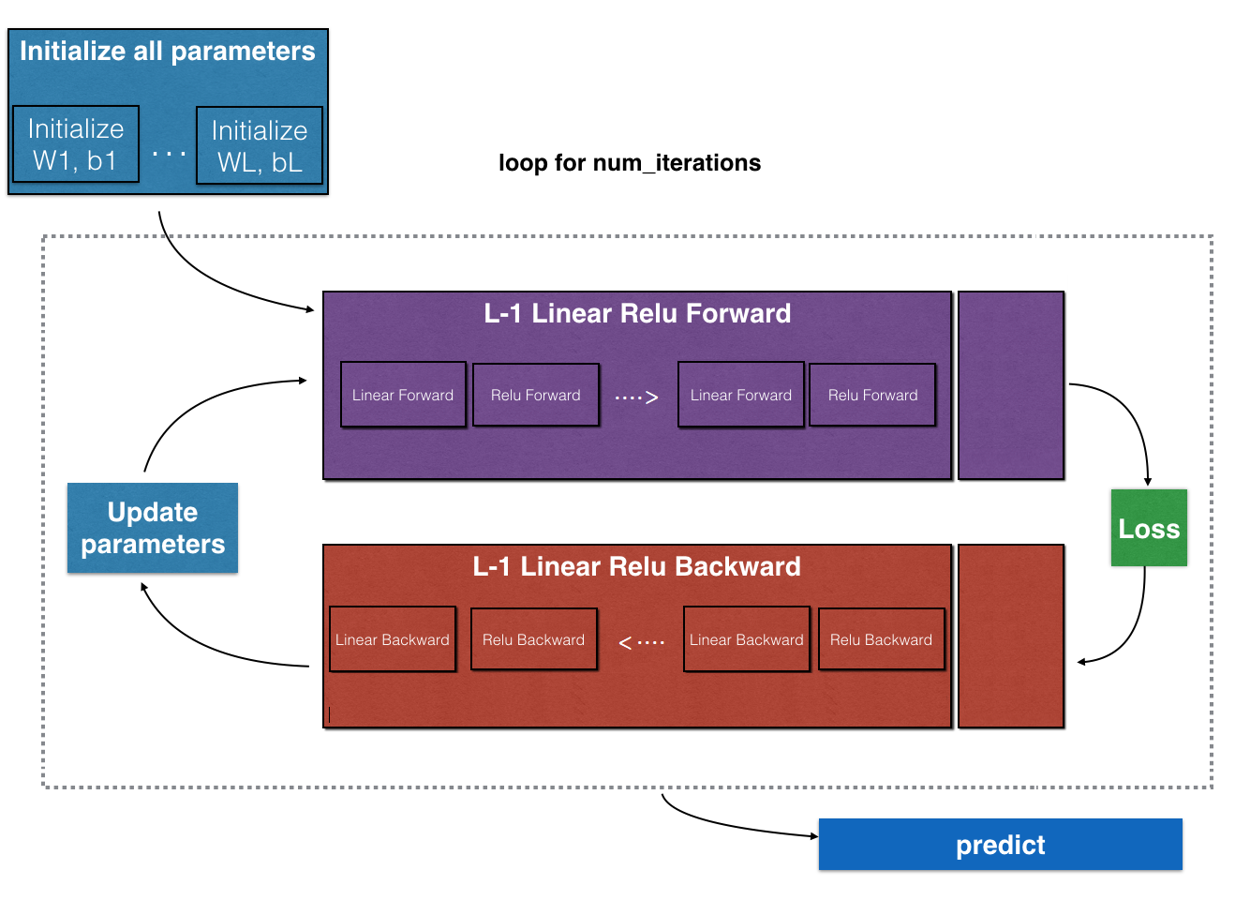

Ch√∫ √Ω ·ªü m·ªói b∆∞·ªõc forward (khung m√†u v√†ng trong h√¨nh tr√™n) ta c√≥ 2 b∆∞·ªõc con l√† Linear forward v√† Activation forward. T∆∞∆°ng t·ª± ·ªü m·ªói b∆∞·ªõc backward (khung m√†u v√†ng trong h√¨nh tr√™n) ta c≈©ng c√≥ 2 b∆∞·ªõc con l√† Activation backward v√† Linear forward.

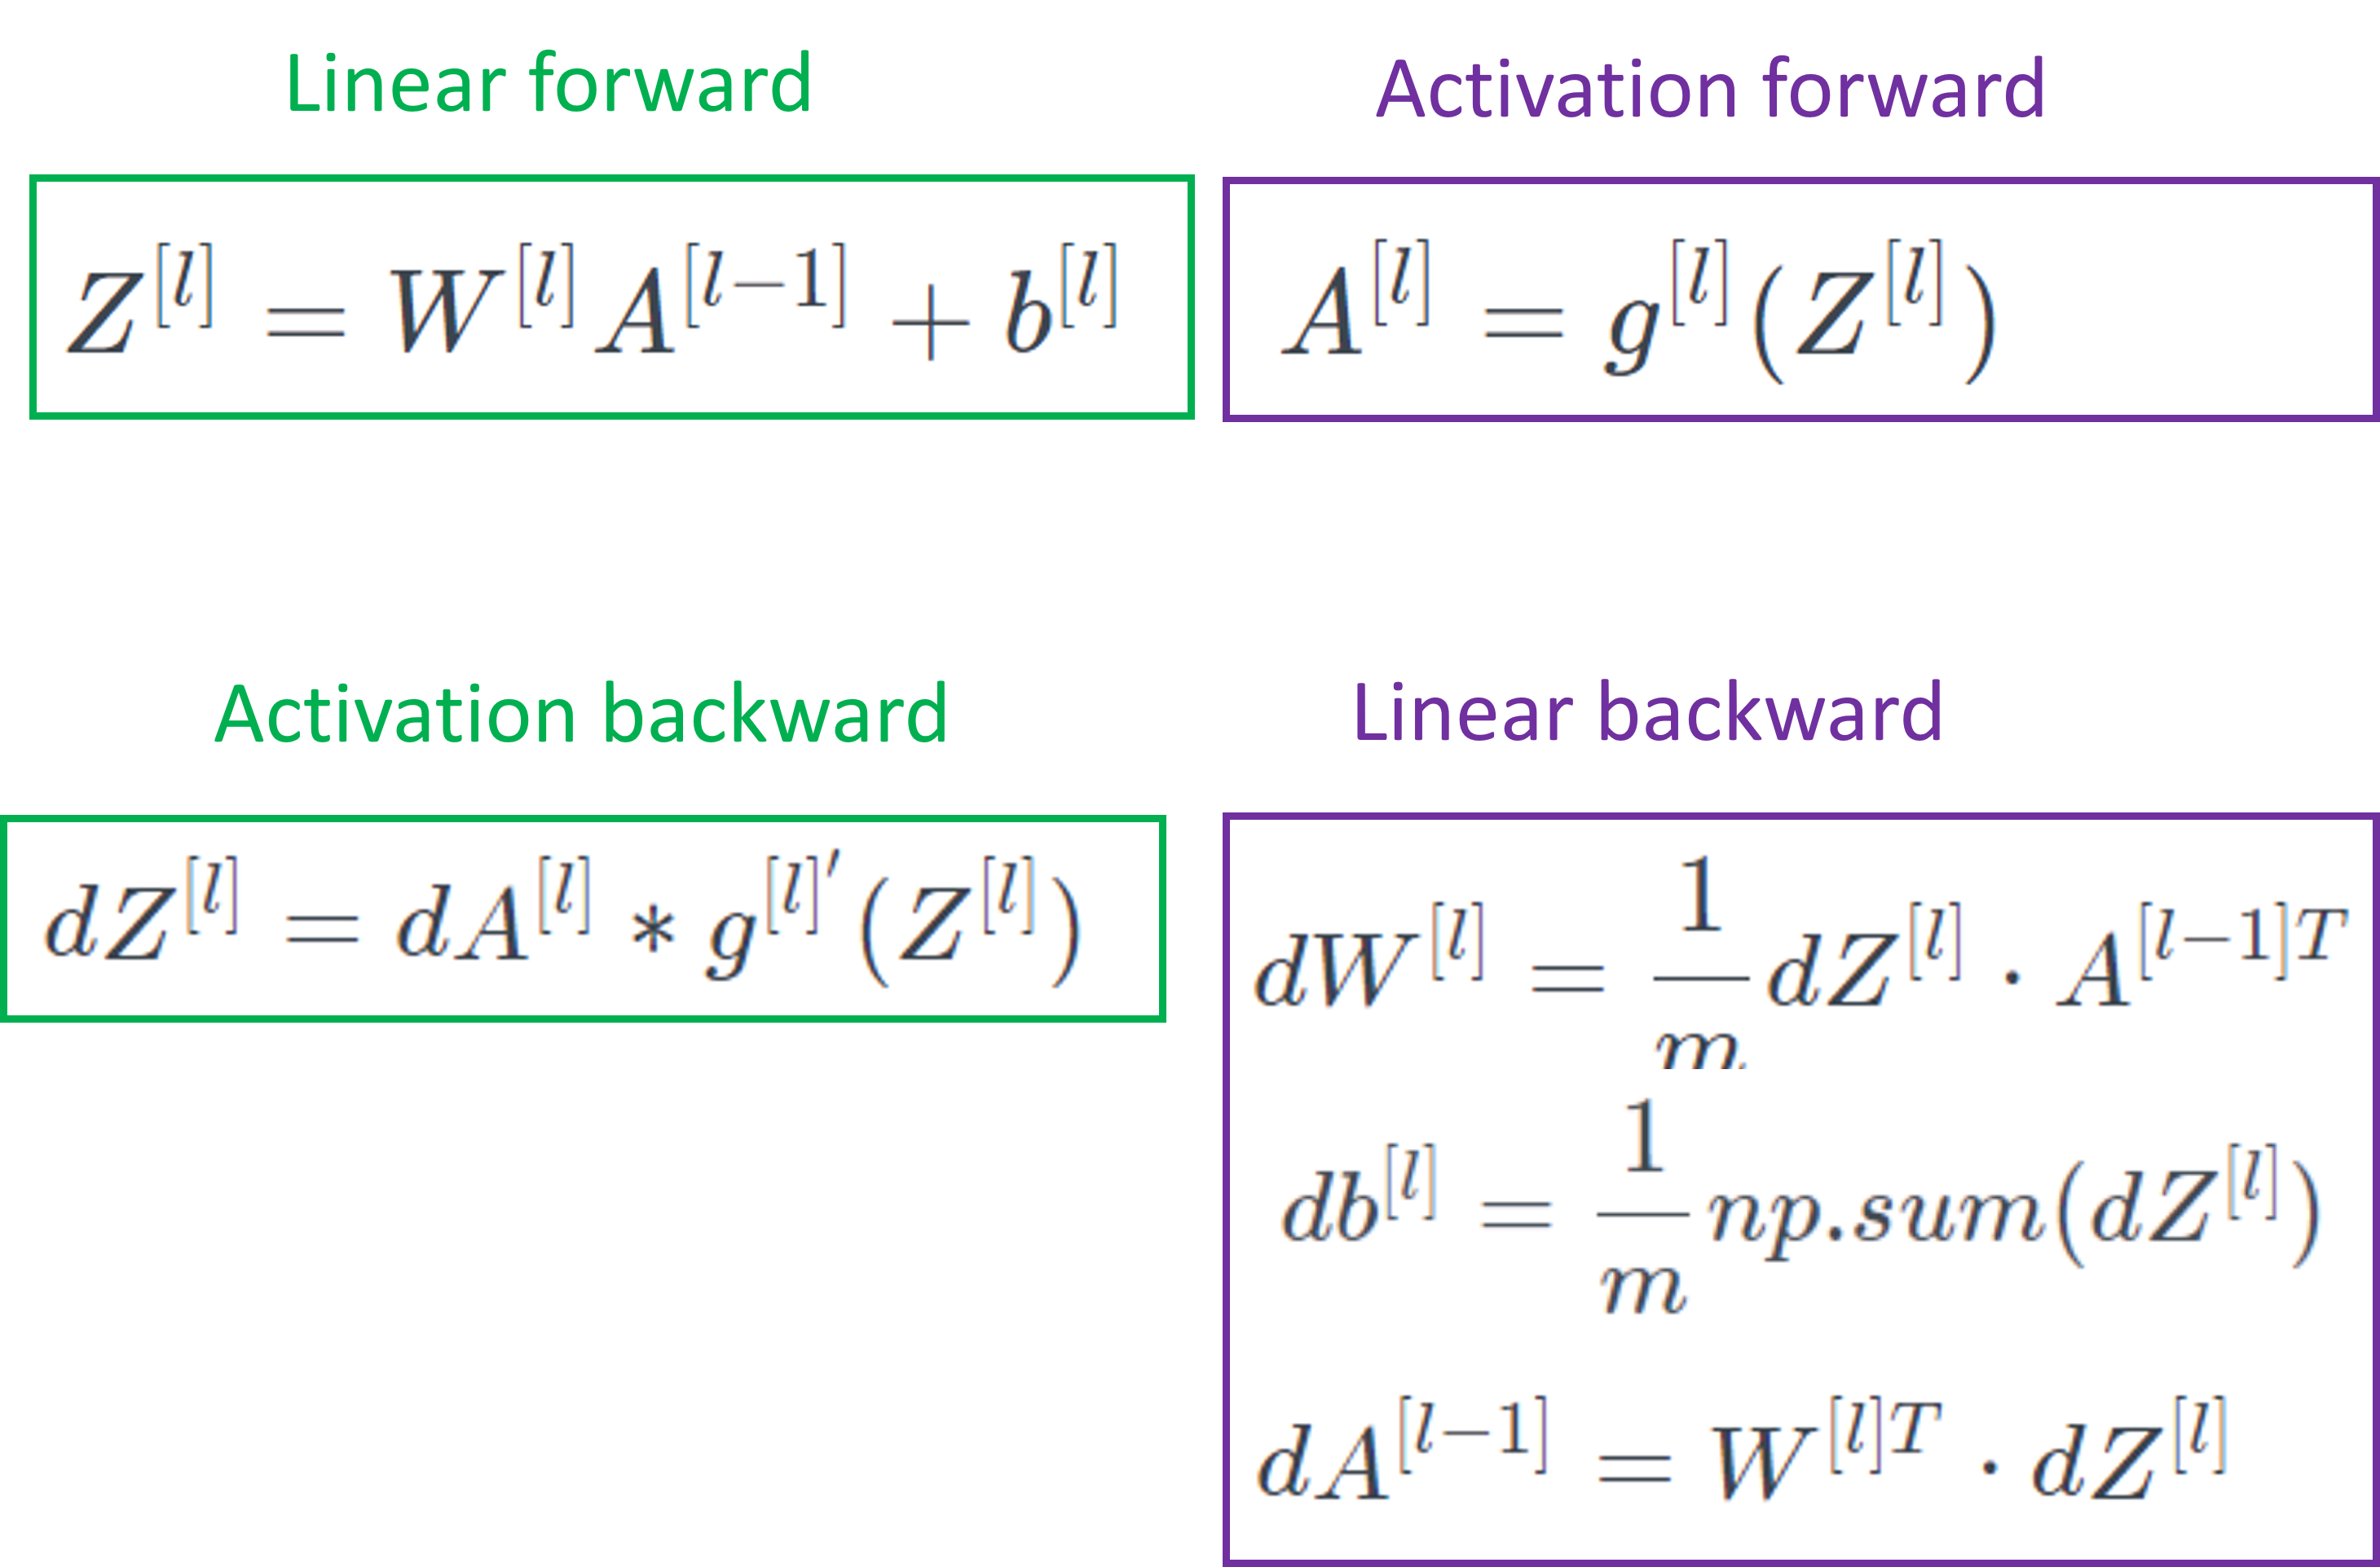


ƒê·ªÉ x√¢y d·ª±ng m·∫°ng n∆°-ron c·ªßa m√¨nh, b·∫°n s·∫Ω th·ª±c hi·ªán m·ªôt s·ªë h√†m "tr·ª£ gi√∫p". C√°c h√†m tr·ª£ gi√∫p n√†y s·∫Ω ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ x√¢y d·ª±ng m·∫°ng n∆° ron hai l·ªõp v√† m·∫°ng n∆° ron L l·ªõp. C√°c b·∫°n s·∫Ω:

- Kh·ªüi t·∫°o tham s·ªë cho neural network
- C√†i ƒë·∫∑t forward propagation module 
- Compute the loss.
- C√†i ƒë·∫∑t backward propagation module
- Update the parameters.

V·ªõi m·ªói forward function s·∫Ω c√≥ m·ªôt backward function t∆∞∆°ng ·ª©ng (c√≥ nghƒ©a l√† 2 h√†m n√†y s·∫Ω c·∫ßn d√πng chung m·ªôt s·ªë bi·∫øn). Do ƒë√≥ t·∫°i m·ªói b∆∞·ªõc c·ªßa h√†m forward, c√°c b·∫°n c·∫ßn ch·ª©a c√°c bi·∫øn n√†y v√†o m·ªôt cache v√† sau ƒë√≥ tr√≠ch xu·∫•t gi√° tr·ªã c√°c bi·∫øn n√†y t·ª´ cache ƒë·ªÉ t√≠nh gradient trong h√†m backward.

## 3 - Initialization

H√†m tr·ª£ gi√∫p ƒë·∫ßu ti√™n l√† h√†m kh·ªüi t·∫°o tham s·ªë.



Ta c·∫ßn kh·ªüi t·∫°o tham s·ªë W v√† b cho L layer. H√£y ch√∫ √Ω k√≠ch th∆∞·ªõc (d√≤ng,c·ªôt) c·ªßa c√°c ma tr·∫≠n tham s·ªë ph·∫£i kh·ªõp gi·ªØa c√°c layer.

Nh·∫Øc l·∫°i r·∫±ng $n^{[l]}$ l√† s·ªë unit ·ªü layer th·ª© $l$. K√≠ch th∆∞·ªõc ma tr·∫≠n $W^{[l]}$ c·ªßa layer $l$ c√≥ $n^{[l]}$ d√≤ng v√† $n^{[l-1]}$ c·ªôt. Bias b l√† m·ªôt vector c·ªôt c√≥ $n^{[l]}$ d√≤ng v√† 1 c·ªôt.

Trong tr∆∞·ªùng h·ª£p b·∫°n c·∫£m th·∫•y l·∫´n l·ªôn v·ªÅ s·ªë chi·ªÅu, h√£y nh√¨n l·∫°i c√°ch t√≠nh $Z$:

$$Z^{[l]}=W^{[l]}A^{[l-1]}+b^{[l]}$$

Do vi·ªác nh√¢n ma tr·∫≠n ƒë∆∞·ª£c th·ª±c hi·ªán theo ki·ªÉu d√≤ng nh√¢n c·ªôt (t·ª©c l√† nh√¢n c√°c ph·∫ßn t·ª≠ c·ªßa m·ªói d√≤ng c·ªßa ma tr√¢n $W^{[l]}$ v·ªõi c√°c ph·∫ßn t·ª≠ c·ªßa vector c·ªôt $A^{[l-1]}$), n√™n s·ªë ph·∫ßn t·ª≠ c·ªßa m·ªói d√≤ng c·ªßa $W^{[l]}$ ph·∫£i b·∫±ng s·ªë ph·∫ßn t·ª≠ c·ªßa vector c·ªôt $A^{[l-1]}$. s·ªë ph·∫ßn t·ª≠ c·ªßa m·ªói d√≤ng c·ªßa $W^{[l]}$ ch√≠nh l√† s·ªë c·ªôt c·ªßa $W^{[l]}$. Do $A^{[l-1]}$ l√† vector c·ªôt ch·ª©a output c·ªßa layer $[l-1]$ n√™n s·ªë ph·∫ßn t·ª≠ c·ªßa $A^{[l-1]}$ ch√≠nh l√† s·ªë unit c·ªßa layer n√†y, t·ª©c l√† $n^{[l-1]}$. Do ƒë√≥ $W^{[l]}$ s·∫Ω c√≥ $n^{[l-1]}$ c·ªôt.

V√≠ d·ª• n·∫øu k√≠ch th∆∞·ªõc c·ªßa d·ªØ li·ªáu ƒë·∫ßu v√†o $X$ l√† $(12288, 209)$ ( t·ª©c l√† c√≥ $m=209$ m·∫´u hu·∫•n luy·ªán), ta c√≥:

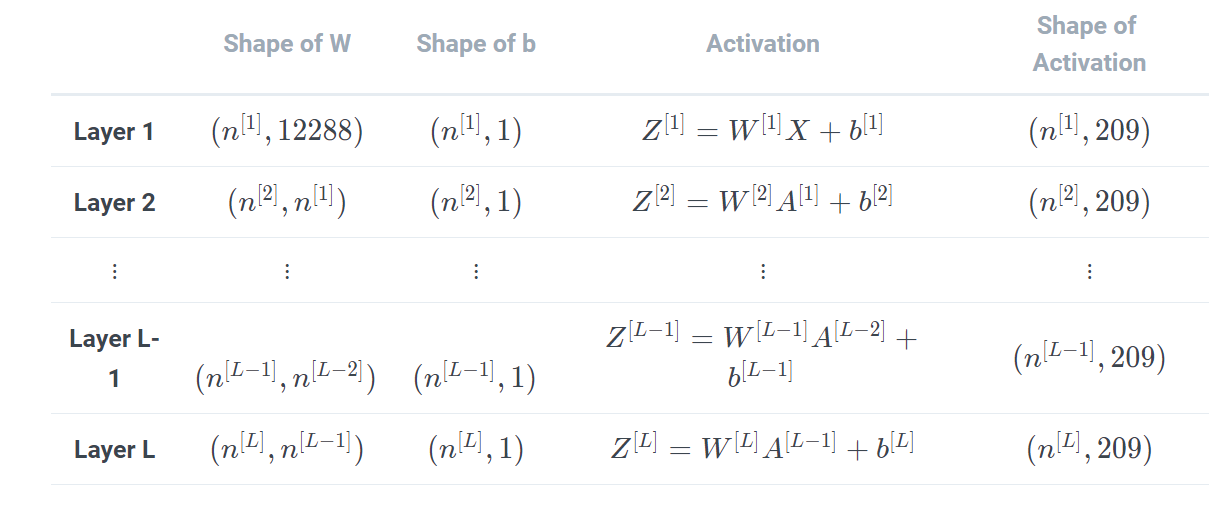





B√†i t·∫≠p 1:

Kh·ªüi t·∫°o tham s·ªë cho L-layer Neural Network. 

Ch·ªâ d·∫´n:
ƒê·∫ßu v√†o c·ªßa h√†m l√† m·ªôt array ch·ª©a k√≠ch th∆∞·ªõc c·ªßa t·ª´ng layer trong network.
ƒê·∫ßu ra s·∫Ω l√† m·ªôt dictionary ch·ª©a c√°c tham s·ªë W1,W2,...,WL v√† b1,b2,...,bL.

T·∫°i layer $l$:
```python

        parameters["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters["b" + str(l)] = np.zeros((layer_dims[l], 1))
```

In [ ]:
# FUNCTION: initialize_parameters_deep

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) ch·ª©a k√≠ch th∆∞·ªõc t·ª´ng layer
    
    Returns:
    parameters -- python dictionary ch·ª©a c√°c tham s·ªë "W1", "b1", ..., "WL", "bL":
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        ### START CODE HERE ### 
        parameters['W' + str(l)] = 
        parameters['b' + str(l)] = 
        ### END CODE HERE ###
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [ ]:
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]


**Expected output**:
       
<table style="width:80%">
  <tr>
    <td> **W1** </td>
    <td>[[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]</td> 
  </tr>
  
  <tr>
    <td>**b1** </td>
    <td>
        <table>
            <tr>
              <td>
                [[ 0.]
              </td>
            </tr>
            <tr>
              <td>
                [ 0.]
              </td>
            </tr>
            <tr>
              <td>
                [ 0.]
              </td>
            </tr>
            <tr>
              <td>
                [ 0.]]
              </td>
            </tr>
        </table>
    <td>    
        
  </tr>
  
  <tr>
    <td>**W2** </td>
    <td>[[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]</td> 
  </tr>
  
  <tr>
    <td>**b2** </td>
    <td>
        <table>
            <tr>
              <td>
                [[ 0.]
              </td>
            </tr>
            <tr>
              <td>
                [ 0.]
              </td>
            </tr>
            <tr>
              <td>
                [ 0.]]
              </td>
            </tr>
        </table>
    </td> 
  </tr>
  
</table>

## 4 - Forward propagation module

### 4.1 - C√†i ƒë·∫∑t activation function

In [ ]:
def sigmoid(Z):

    A = 1/(1+np.exp(-Z))

    return A

def relu(Z):

    A = np.maximum(0,Z)

    assert(A.shape == Z.shape)
    
    return A


### 4.2 - Linear-Activation Forward

B√†i t·∫≠p 2: c√†i ƒë·∫∑t linear-activation forward 

Nh∆∞ ƒë√£ n√≥i ·ªü m·ª•c 2, m·ªói b∆∞·ªõc Linear-Activation Foward g·ªìm 2 b∆∞·ªõc g·ªìm:

- Linear forward:      t√≠nh $Z^{[l]}=W^{[l]}A^{[l-1]}+b$
- Activation forward: t√≠nh $A^{[l]}=g(Z^{[l]})$ trong ƒë√≥ $g$ l√† activation function (Sigmoid ho·∫∑c ReLU)

**Quan tr·ªçng:** H√£y ch√∫ √Ω c√°ch l∆∞u l·∫°i c√°c gi√° tr·ªã A, W, b, Z:

- C√°c gi√° tr·ªã A_prev, W, b d√πng ·ªü b∆∞·ªõc linear forward s·∫Ω ƒë∆∞·ª£c l∆∞u trong linear_cache. Ta s·∫Ω d√πng c√°c gi√° tr·ªã n√†y trong b∆∞·ªõc linear forward.
- Gi√° tr·ªã Z d√πng ·ªü b∆∞·ªõc activation forward s·∫Ω ƒë∆∞·ª£c l∆∞u trong activation_cache. Ta s·∫Ω d√πng c√°c gi√° tr·ªã n√†y trong b∆∞·ªõc activation forward.

In [ ]:
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    C√†i ƒë·∫∑t h√†m forward propagation cho m·ªôt layer

    Arguments:
    A_prev -- output c·ªßa layer tr∆∞·ªõc, k√≠ch th∆∞·ªõc (size of previous layer, number of examples)
    W -- ma tr·∫≠n W c·ªßa layer hi·ªán t·∫°i, k√≠ch th∆∞·ªõc (size of current layer, size of previous layer)
    b -- vector c·ªôt b c·ªßa layer hi·ªán t·∫°i, k√≠ch th∆∞·ªõc (size of the current layer, 1)
    activation -- lo·∫°i activation function d√πng cho layer hi·ªán t·∫°i, l√† m·ªôt chu·ªói c√≥ gi√° tr·ªã "sigmoid" ho·∫∑c "relu"

    Returns:
    A -- output c·ªßa layer hi·ªán t·∫°i
    cache -- python dictionary ch·ª©a "linear_cache" and "activation_cache" s·∫Ω ƒë∆∞·ª£c d√πng ·ªü b∆∞·ªõc linear backward v√† activation backward
    """
    
    # c√†i ƒë·∫∑t linear forward
    ### START CODE HERE ### (‚âà 1 line of code)
    Z = 
    ### END CODE HERE ###
    assert(Z.shape == (W.shape[0], A_prev.shape[1]))
    
    
    
    # c√†i ƒë·∫∑t activation forward
    if activation == "sigmoid":
        ### START CODE HERE ### (‚âà 1 lines of code)
        A  = 
        ### END CODE HERE ###
    
    elif activation == "relu":
        ### START CODE HERE ### (‚âà 1 lines of code)
        A = 
        ### END CODE HERE ###
    
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    
    linear_cache = (A_prev, W, b) #s·∫Ω ƒë∆∞·ª£c d√πng ·ªü b∆∞·ªõc linear backward cho layer hi·ªán t·∫°i
    activation_cache = Z #s·∫Ω ƒë∆∞·ª£c d√πng ·ªü b∆∞·ªõc activation backward cho layer hi·ªán t·∫°i
    
    cache = (linear_cache, activation_cache) 
    
    return A, cache

In [ ]:
A_prev, W, b = linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]


**Expected output**:
       
<table style="width:35%">
  <tr>
    <td> **With sigmoid: A ** </td>
    <td > [[ 0.96890023  0.11013289]]</td> 
  </tr>
  <tr>
    <td> **With ReLU: A ** </td>
    <td > [[ 3.43896131  0.        ]]</td> 
  </tr>
</table>


### d) Forward propagation cho L layer

B√†i t·∫≠p 3: c√†i ƒë·∫∑t forward propagation cho L layer

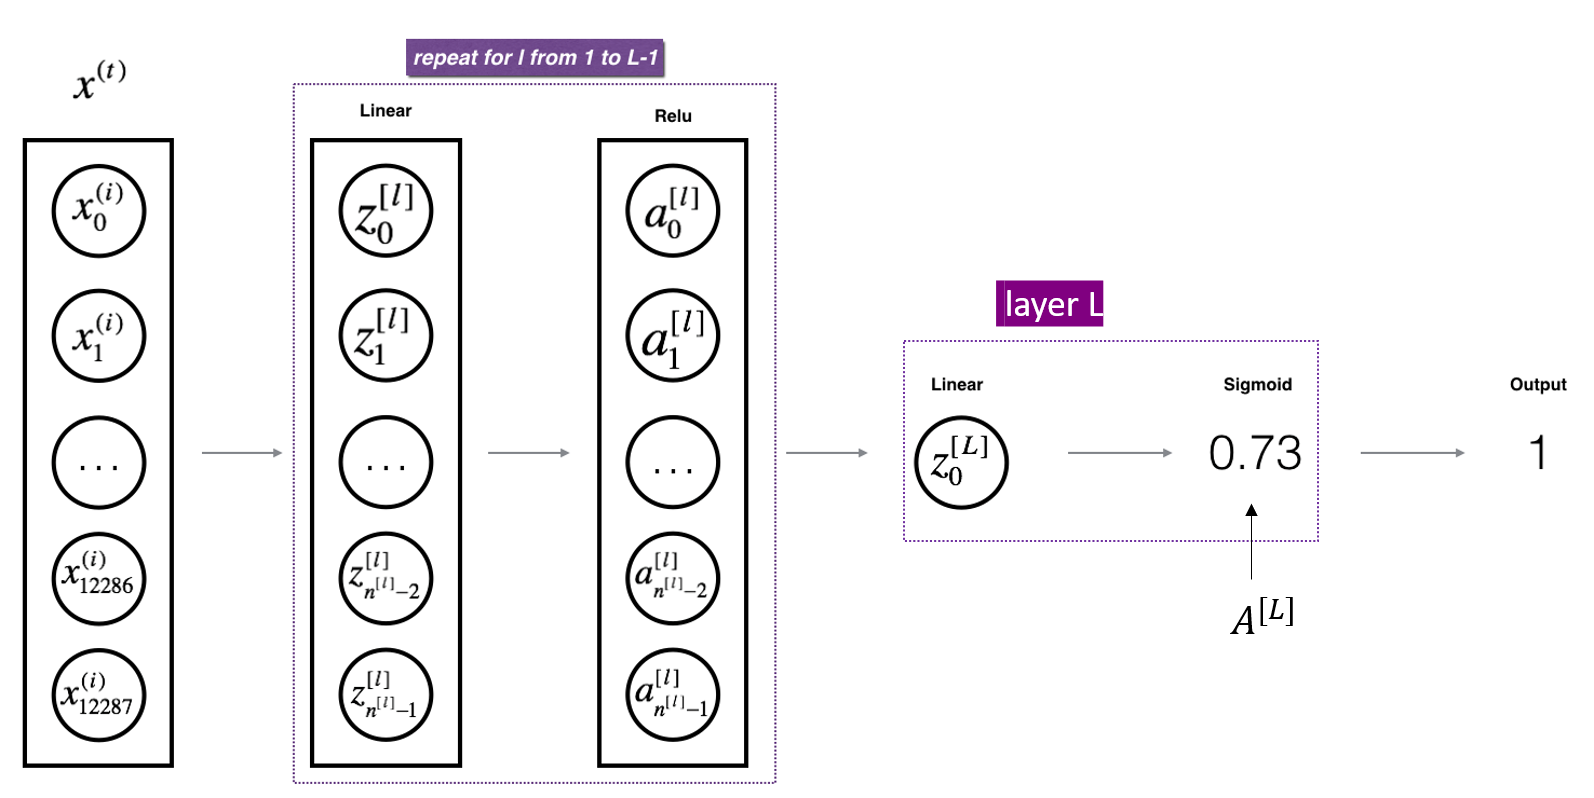


H∆∞·ªõng d·∫´n: 
- T·ª´ layer 0 ƒë·∫øn layer L-1 ta d√πng h√†m `linear_activation_forward` v·ªõi lo·∫°i activation l√† "relu". 
- ·ªû layer L ta d√πng h√†m `linear_activation_forward` v·ªõi lo·∫°i activation l√† "sigmoid".
- H√£y nh·ªõ ch√®n cache ·ªü layer hi·ªán t·∫°i v√†o m·ªôt "caches" list. 

In [ ]:
# GRADED FUNCTION: L_layer_forward

def L_layer_forward(X, parameters):
    """
    Forward propagation cho L layer
    
    Arguments:
    X -- d·ªØ li·ªáu ƒë·∫ßu v√†o, l√† ma tr·∫≠n k√≠ch th∆∞·ªõc (input size, number of examples)
    parameters -- l√† output c·ªßa h√†m initialize_parameters_deep(), ch·ª©a c√°c tham s·ªë W,b c·ªßa t·∫•t c·∫£ L layer
    
    Returns:
    AL -- output c·ªßa layer cu·ªëi c√πng AL
    caches -- danh s√°ch ch·ª©a:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # T·∫°i layer 0 ƒë·∫øn layer L-1
    for l in range(1, L):
        A_prev = A 
   
        A, cache = linear_activation_forward(A_prev,parameters['W'+str(l)],parameters['b' + str(l)],"relu")
        caches.append(cache)
   
    
    # T·∫°i layer L
    ### START CODE HERE ### 
    AL, cache = 
    caches.append(cache)
    ### END CODE HERE ###
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [ ]:
X, parameters = L_model_forward_test_case_2hidden()
AL, caches = L_layer_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[0.03921668 0.70498921 0.19734387 0.04728177]]
Length of caches list = 3


<table style="width:50%">
  <tr>
    <td> **AL** </td>
    <td > [[ 0.03921668  0.70498921  0.19734387  0.04728177]]</td> 
  </tr>
  <tr>
    <td> **Length of caches list ** </td>
    <td > 3 </td> 
  </tr>
</table>

## 5 - Cost function

Sau b∆∞·ªõc forward propagation cho L layer v√† thu ƒë∆∞·ª£c output $A^{[L]}$, ta c√≥ th·ªÉ d√πng output n√†y ƒë·ªÉ t√≠nh cost.

H√†m compute_cost s·∫Ω t√≠nh gi√° tr·ªã cross-entropy cost $J$: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right))¬†\tag{7}$$

Do h√†m n√†y ƒë√£ ƒë∆∞·ª£c c√†i ƒë·∫∑t ·ªü c√°c assignment tr∆∞·ªõc, l·∫ßn n√†y c√°c b·∫°n s·∫Ω kh√¥ng ph·∫£i c√†i ƒë·∫∑t h√†m n√†y üò∏üò∏üò∏.


In [ ]:
# FUNCTION: compute_cost

def compute_cost(AL, Y):
    """
    T√≠nh gi√° tr·ªã cross-entropy cost

    Arguments:
    AL -- output c·ªßa layer L (layer cu·ªëi c√πng)
    Y -- nh√£n ƒë√∫ng (v√≠ d·ª• 0 if non-cat, 1 if cat), k√≠ch th∆∞·ªõc (1, s·ªë m·∫´u hu·∫•n luy·ªán)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    logprobs = np.multiply(np.log(AL), Y) + np.multiply((1 - Y), np.log(1 - AL))
    cost = -1/m*np.sum(logprobs)
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [ ]:
Y, AL = compute_cost_test_case()

print("cost = " + str(compute_cost(AL, Y)))

cost = 0.41493159961539694


**Expected Output**:

<table>

    <tr>
    <td>**cost** </td>
    <td> 0.41493159961539694</td> 
    </tr>
</table>

## 6 - Backward propagation module

Nh∆∞ ƒë√£ n√≥i ·ªü m·ª•c 2, m·ªói b∆∞·ªõc backward propagation g·ªìm 2 b∆∞·ªõc:

- Activation backward: t√≠nh dZ
- Linear backwkakrd: t√≠nh dW, db, dA_pre t·ª´ dZ

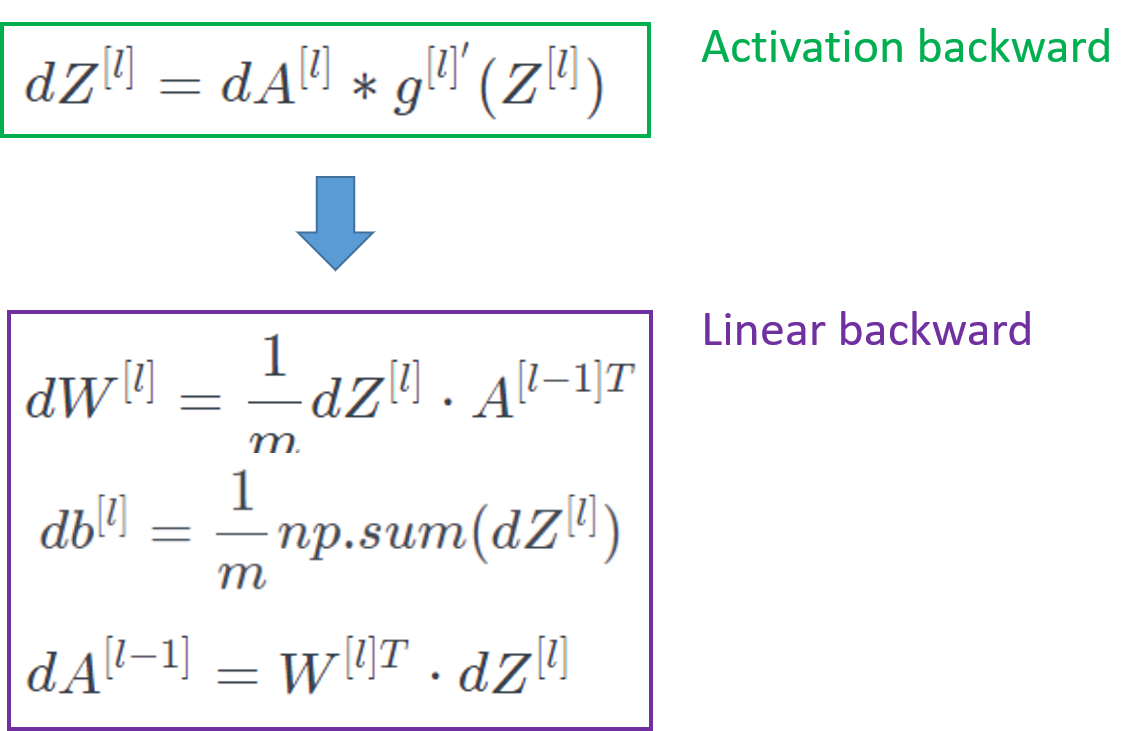



### 6.1 - Activation backward###

Tr∆∞·ªõc ti√™n ta c·∫ßn c√†i ƒë·∫∑t h√†m activation backward. 
Do c√≥ 2 lo·∫°i activation function (sigmoid v√† ReLU) n√™n ta c√†i ƒë·∫∑t 2 h√†m relu_backward v√† sigmoid_backward.

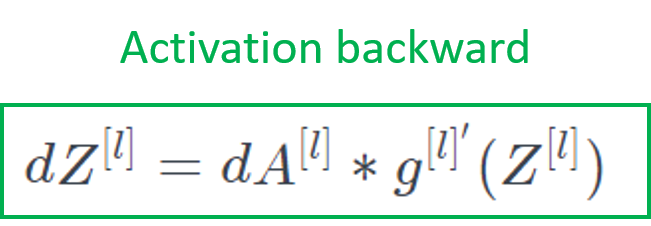

Nh√¨n h√¨nh tr√™n ta c√≥ th·ªÉ th·∫•y input v√† output c·ªßa h√†m activation backward.

- Input:  dA v√† Z (Z ƒë∆∞·ª£c l∆∞u trong activation_cache)

- Output: dZ

C√°c b·∫°n c≈©ng kh√¥ng c·∫ßn ph·∫£i c√†i ƒë·∫∑t h√†m n√†y, nh∆∞ng h√£y nh√¨n c√¥ng th·ª©c h√¨nh d∆∞·ªõi v√† code v√† ch·∫Øc ch·∫Øn hi·ªÉu r√µ v·ªÅ c√°ch c√†i ƒë·∫∑t nh√©.

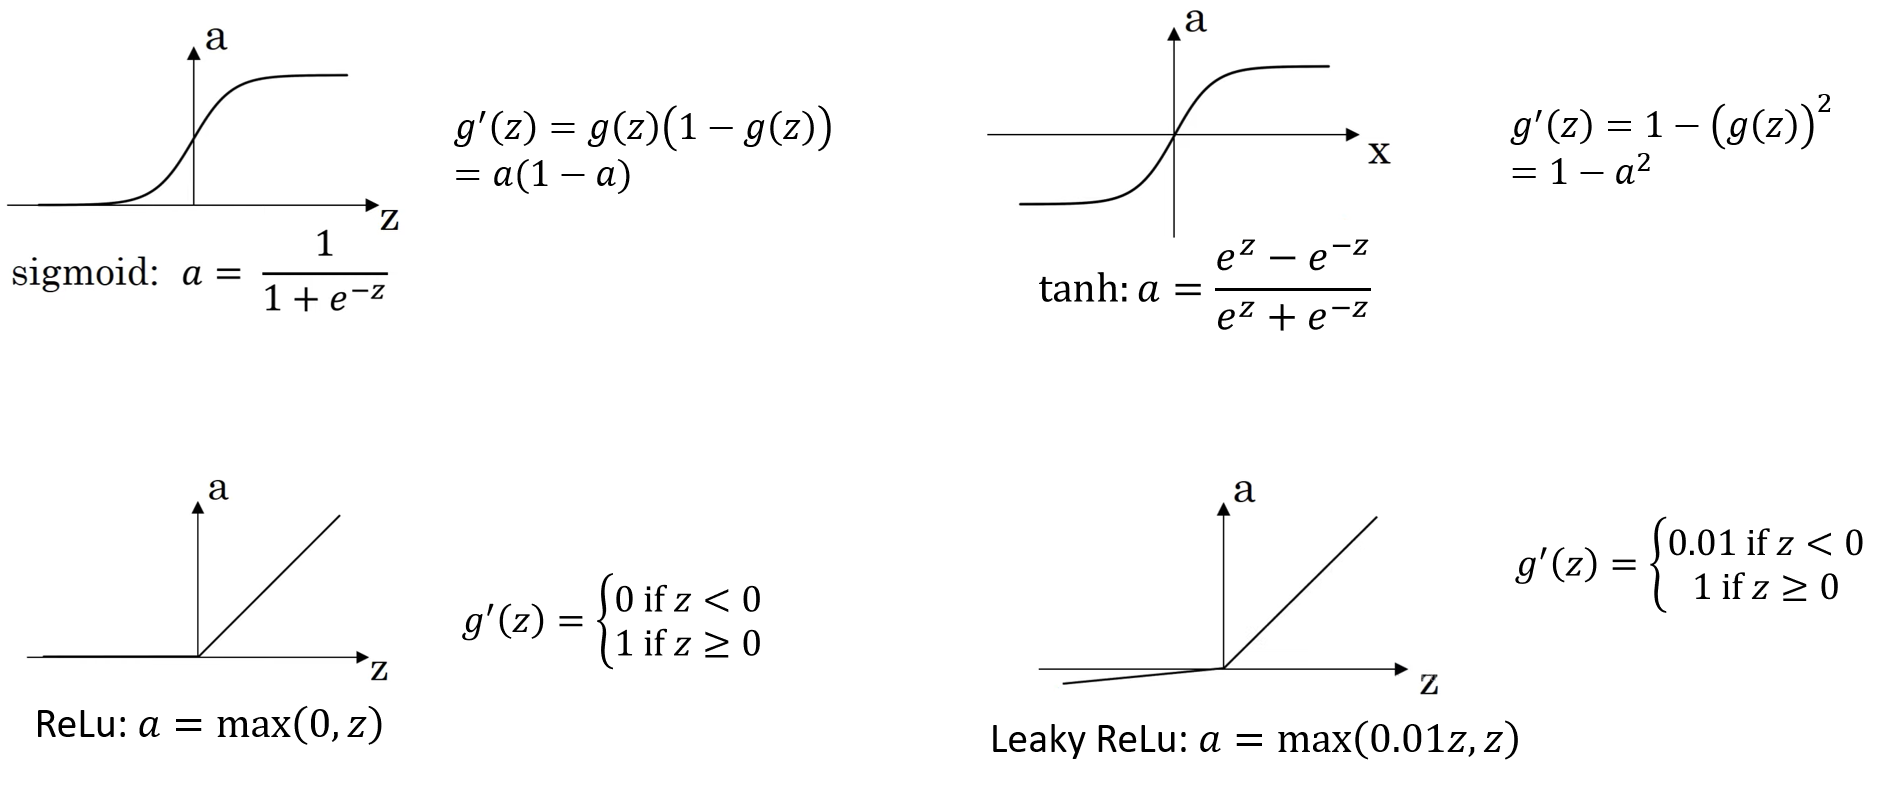

D∆∞·ªõi ƒë√¢y l√† code cho hai h√†m relu_backward v√† sigmoid_backward.

In [ ]:
def relu_backward(dA, activation_cache):

    Z = activation_cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
 
    dZ[Z <= 0] = 0

    assert (dZ.shape == Z.shape)

    return dZ

def sigmoid_backward(dA, activation_cache):

    Z = activation_cache

    A = 1/(1+np.exp(-Z))
    dZ = dA * A * (1-A)

    assert (dZ.shape == Z.shape)

    return dZ

### 6.2 - Linear backward

Sau khi c√≥ dZ, ta c√≥ th·ªÉ t√≠nh dW, db, v√† dA_prev.

B√†i t·∫≠p 4:

C√†i ƒë·∫∑t h√†m linear_backward().

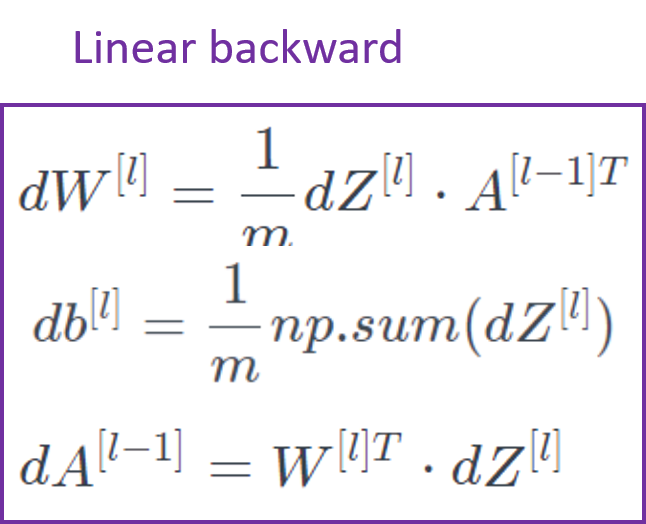

Nh√¨n h√¨nh tr√™n ta c√≥ th·ªÉ th·∫•y input v√† oupt c·ªßa h√†m linear backward:

- Input:  dZ, W, A_pre
- Output: dA_pre

Nh·ªõ l√† W v√† A_pre ƒë∆∞·ª£c l∆∞u trong linear_cache khi t√≠nh linear_forward t·∫°i layer hi·ªán t·∫°i.

In [ ]:
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, linear_cache):
    """
    C√†i ƒë·∫∑t b∆∞·ªõc backward propagation t·∫°i layer l

    Arguments:
    dZ -- gradient c·ªßa linear output (c·ªßa layer hi·ªán t·∫°i l)
    linear_cache -- ch·ª©a gi√° tr·ªã (A_prev, W, b) 

    Returns:
    dA_prev -- gradient c·ªßa activation (c·ªßa layer tr∆∞·ªõc ƒë√≥ l-1), c√πng k√≠ch th∆∞·ªõc v·ªõi A_prev
    dW -- gradient c·ªßa W (c·ªßa layer hi·ªán t·∫°i l), c√πng k√≠ch th∆∞·ªõc v·ªõi W
    db -- gradient c·ªßa b (c·ªßa layer hi·ªán t·∫°i l), c√πng k√≠ch th∆∞·ªõc v·ªõi b
    """
    A_prev, W, b = linear_cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (‚âà 3 lines of code)
    dW = 
    db =  1/m*(np.sum(dZ,axis=1, keepdims=True))
    dA_prev = np.dot(W.T,dZ)
    ### END CODE HERE ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [ ]:
# Set up some test inputs
dZ, linear_cache = linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = [[0.50629448]]


**Expected Output**: 

<table style="width:90%">
  <tr>
    <td> **dA_prev** </td>
    <td > [[ 0.51822968 -0.19517421]
          [-0.40506361  0.15255393]
          [ 2.37496825 -0.89445391]]
    </td> 
  </tr> 
  
  <tr>
    <td> **dW** </td>
    <td > [[-0.10076895  1.40685096  1.64992505]] </td> 
  </tr> 
  
  <tr>
    <td> **db** </td>
    <td> [[ 0.50629448]] </td> 
  </tr> 
    
</table>



### 6.2 - Linear-Activation backward

Sau khi c√≥ hai h√†m activation_backward v√† linear_backward, ta c√≥ th·ªÉ d√πng ch√∫ng ƒë·ªÉ c√†i ƒë·∫∑t h√†m linear_activation_backward

B√†i t·∫≠p 5: c√†i ƒë·∫∑t h√†m linear_activation_backward

In [ ]:
# FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    C√†i ƒë·∫∑t backward propagation cho layer hi·ªán t·∫°i l
    
    Arguments:
    dA -- gradient c·ªßa activation A c·ªßa layer hi·ªán t·∫°i l 
    cache -- ch·ª©a linear_cache v√† activation_cache
    activation -- lo·∫°i activation d√πng ·ªü layer hi·ªán t·∫°i, l√† chu·ªói c√≥ gi√° tr·ªã "sigmoid" or "relu"
    
    Returns:
    dA_prev -- gradient c·ªßa activation A_pre c·ªßa layer tr∆∞·ªõc ƒë√≥ l-1, c√≥ c√πng k√≠ch th∆∞·ªõc v·ªõi A_prev
    dW -- gradient c·ªßa W c·ªßa layer hi·ªán t·∫°i
    db -- gradient c·ªßa b c·ªßa layer hi·ªán t·∫°i
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ### (‚âà 2 lines of code)
        dZ = 
        ### END CODE HERE ###
        
    elif activation == "sigmoid":

        dZ = sigmoid_backward(dA,activation_cache)

    dA_prev, dW, db = linear_backward(dZ,linear_cache)
    return dA_prev, dW, db

In [ ]:
AL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989 -0.        ]
 [ 0.37883606 -0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


**Expect output:**

sigmoid:
dA_prev = [[ 0.11017994 0.01105339]

           [ 0.09466817 0.00949723]
           
           [-0.05743092 -0.00576154]]

dW = [[ 0.10266786 0.09778551 -0.01968084]]

db = [[-0.05729622]]


relu:
dA_prev = [[ 0.44090989 0. ]

           [ 0.37883606 0. ]
           
           [-0.2298228 0. ]]

dW = [[ 0.44513824 0.37371418 -0.10478989]]

db = [[-0.20837892]]

### 6.3 - L_layer Backward 

B√†i t·∫≠p 6:

D√πng h√†m linear_activation_backward ƒë·ªÉ c√†i ƒë·∫∑t h√†m L_layer_backward ƒë·ªÉ t√≠nh gradient c·ªßa c√°c tham s·ªë W v√† b tr√™n L layer.

L∆∞u √Ω ƒë·∫ßu v√†o c·ªßa backward propagation l√† dAL. V·ªõi h√†m cross-entropy cost, dAL ƒë∆∞·ª£c t√≠nh nh∆∞ sau:
```python
dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL
```

Sau ƒë√≥ v·ªõi layer L, ta t√≠nh gradient v·ªõi lo·∫°i activation function  l√† "sigmoid".
V·ªõi layer t·ª´ L-1 ƒë·∫øn 1, ta t√≠nh gradient v·ªõi lo·∫°i activation function l√† "relu".

L∆∞u √Ω: Ta c·∫ßn l∆∞u c√°c gi√° tr·ªã gradient dW v√† db t·∫°i t·∫•t c·∫£ layer l v√†o m·ªôt t·ª´ ƒëi·ªÉn "grads":

$$grads["dW" + str(l)] = dW^{[l]}\tag{15} $$

V√≠ d·ª•, v·ªõi $l=3$ ta s·∫Ω l∆∞u $dW^{[3]}$ d∆∞·ªõi d·∫°ng `grads["dW3"]`.


In [ ]:
# GRADED FUNCTION: L_model_backward

def L_layer_backward(AL, Y, caches):
    """
    Backward propagation cho L layer
    
    Arguments:
    AL -- output c·ªßa forward propagation
    Y -- nh√£n ƒë√∫ng (0 if non-cat, 1 if cat)
    caches -- ch·ª©a linear_cache v√† activation_cache
    
    Returns:
    grads -- t·ª´ ƒëi·ªÉn d√πng ƒë·ªÉ ch·ª©a gradient dW, db t·∫°i m·ªói layer l
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # T√≠nh dAL ƒë·ªÉ kh·ªüi ƒë·∫ßu backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    
    # T√≠nh gradient dWL,dbL,dA_prev t·∫°i layer L

    current_cache = caches[L-1]
    dA_prev, grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL,current_cache,"sigmoid")

    
    # T√≠nh gradient dWl,dbl,dA_prev t·∫°i layer l
    for l in reversed(range(L-1)):
        ### START CODE HERE ### (approx. 5 lines)
        current_cache = caches[l]
        dA_prev, dW_temp, db_temp = 
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        ### END CODE HERE ###

    return grads

In [ ]:
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_layer_backward(AL, Y_assess, caches)
print_grads(grads)

dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]


**Expected Output**

dW1 = [[ 0.41010002 0.07807203 0.13798444 0.10502167]

       [ 0. 0. 0. 0. ]
       
       [ 0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]

       [ 0. ]
       
       [-0.02835349]]

### 6.4 - Update Parameters

Update s·ª≠ d·ª•ng gradient descent: 

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$

trong ƒë√≥ $\alpha$ l√† learning rate. 

C√°c b·∫°n kh√¥ng ph·∫£i c√†i ƒë·∫∑t h√†m n√†y, nh∆∞ng h√£y ch·∫Øc ch·∫Øn hi·ªÉu code nh√©.

In [ ]:
# FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters) //2 # number of layers in the neural network
    for i in range(1,L+1):
        parameters["W" + str(i)] = parameters["W" + str(i)] - learning_rate*grads["dW"+str(i)]
        parameters["b" + str(i)] = parameters["b" + str(i)] - learning_rate*grads["db"+str(i)]
        
    return parameters

In [ ]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


**Expected Output**:

W1 = [[-0.59562069 -0.09991781 -2.14584584 1.82662008]

      [-1.76569676 -0.80627147 0.51115557 -1.18258802]
      
      [-1.0535704 -0.86128581 0.68284052 2.20374577]]

b1 = [[-0.04659241]

      [-1.28888275]
      
      [ 0.53405496]]

W2 = [[-0.55569196 0.0354055 1.32964895]]

b2 = [[-0.84610769]]

## 7- K·∫øt h·ª£p t·∫•t c·∫£ th√†nh ph·∫ßn ƒë·ªÉ t·∫°o m√¥ h√¨nh

B√†i t·∫≠p 7:

V·∫≠y l√† ta ƒë√£ c√≥ t·∫•t c·∫£ th√†nh ph·∫ßn c·∫ßn thi·∫øt c·ªßa m√¥ h√¨nh. Gi·ªù l√† l√∫c k·∫øt h·ª£p ch√∫ng ƒë·ªÉ c√†i ƒë·∫∑t m·ªôt m√¥ h√¨nh Neural Network L l·ªõp.

In [ ]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.01, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: 

    Arguments:
    X -- d·ªØ li·ªáu ƒë·∫ßu v√†o (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost

    # Parameters initialization. (‚âà 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###

    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation:

        AL, caches = 


        # Compute cost.
        ### START CODE HERE ### (‚âà 1 line of code)
        cost = 
        ### END CODE HERE ###

        # Backward propagation.

        grads = L_layer_backward(AL, Y, caches)


        # Update parameters.
        ### START CODE HERE ### (‚âà 1 line of code)
        parameters = 
        ### END CODE HERE ###

        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)

    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [ ]:
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
    train_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels
    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
    test_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels
    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    train_y_orig = train_y_orig.reshape((1, train_y_orig.shape[0]))
    test_y_orig = test_y_orig.reshape((1, test_y_orig.shape[0]))
    return train_x_orig, train_y_orig, test_x_orig, test_y_orig, classes

train_x_orig, train_y, test_x_orig, test_y, classes = load_dataset()


# Reshape the training and test examples
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T


# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.


## 8 - Ch·∫°y th·ª≠ m√¥ h√¨nh ü•≥ü•≥ü•≥

H√£y ch·∫°y th·ª≠ m√¥ h√¨nh xem k·∫øt qu·∫£ th·∫ø n√†o nh√©. Ch√∫ng ta s·∫Ω t·∫°o m·ªôt m√¥ h√¨nh v·ªõi 4 layer v·ªõi k√≠ch th∆∞·ªõc c√°c l·ªõp l√† 12288, 20, 7, 5, 1. H√£y xem m√¥ h√¨nh h·ªçc v·ªõi b·ªô d·ªØ li·ªáu ·∫£nh m√®o th·∫ø n√†o nh√© (vi·ªác m√¥ h√¨nh h·ªçc ƒë∆∞·ª£c hay kh√¥ng th·ªÉ hi·ªán qua vi·ªác cost c√≥ gi·∫£m qua c√°c l·∫ßn l·∫∑p hay kh√¥ng).


Cost after iteration 0: 0.693148
Cost after iteration 100: 0.674096
Cost after iteration 200: 0.662521
Cost after iteration 300: 0.655453
Cost after iteration 400: 0.651112
Cost after iteration 500: 0.648432
Cost after iteration 600: 0.646767
Cost after iteration 700: 0.645729
Cost after iteration 800: 0.645080
Cost after iteration 900: 0.644672
Cost after iteration 1000: 0.644415
Cost after iteration 1100: 0.644253
Cost after iteration 1200: 0.644151
Cost after iteration 1300: 0.644086
Cost after iteration 1400: 0.644045
Cost after iteration 1500: 0.644019
Cost after iteration 1600: 0.644002
Cost after iteration 1700: 0.643992
Cost after iteration 1800: 0.643985
Cost after iteration 1900: 0.643981
Cost after iteration 2000: 0.643978
Cost after iteration 2100: 0.643977
Cost after iteration 2200: 0.643976
Cost after iteration 2300: 0.643975
Cost after iteration 2400: 0.643975


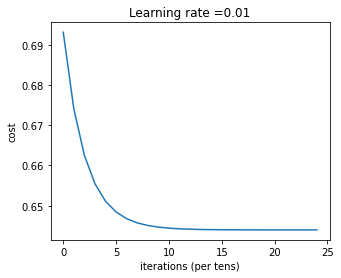

In [ ]:
layers_dims = [12288, 20, 7, 5, 1] # 4-layer model
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)


C√≥ v·∫ª m√¥ h√¨nh ƒëang g·∫∑p v·∫•n ƒë·ªÅ, ta th·∫•y cost kh√¥ng gi·∫£m m·∫•y sau c√°c l·∫ßn l·∫∑p. ü§¶ü§¶ü§¶
Nh∆∞ng h√£y c·ªë th·ª≠ xem ƒë·ªô ch√≠nh x√°c tr√™n t·∫≠p train v√† t·∫≠p test l√† bao nhi√™u nh√©.
ƒê·∫ßu ti√™n ta c·∫ßn c√†i ƒë·∫∑t h√†m predict. H√†m n√†y ƒë∆°n gi·∫£n s·∫Ω d√πng tham s·ªë sau khi h·ªçc v√† d√πng h√†m L_layer_forward ƒë·ªÉ t√≠nh output c·ªßa network. Output n√†y ch√≠nh l√† x√°c xu·∫•t ·∫£nh l√† m√®o hay kh√¥ng ph·∫£i m√®o. Sau ƒë√≥ x√°c su·∫•t n√†y s·∫Ω ƒë∆∞·ª£c chuy·ªÉn th√†nh d·ª± ƒëo√°n 0 ho·∫∑c 1.


In [ ]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.

    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model

    Returns:
    p -- predictions for the given dataset X
    """
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))

    # Forward propagation
    probas, caches = L_layer_forward(X, parameters)


    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))

    return p

Xem th·ª≠ ƒë·ªô ch√≠nh x√°c tr√™n t·∫≠p train v√† t·∫≠p test.

In [ ]:
pred_train = predict(train_x, train_y, parameters)
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.6555023923444976
Accuracy: 0.3400000000000001



## 9 - Conclusion

Nh∆∞ v·∫≠y sau bao c√¥ng s·ª©c b·ªè ra th√¨ ta ƒë√£ thu ƒë∆∞·ª£c m·ªôt m√¥ h√¨nh c√≥ th·ªÉ d·ª± ƒëo√°n ƒë∆∞·ª£c b·ªô ·∫£nh m√®o v·ªõi ƒë·ªô ch√≠nh x√°c 34%, t·ª©c l√† c√≤n thua tung ƒë·ªìng xu ƒë·ªÉ d·ª± ƒëo√°n (xs 50%) üòπüòπüòπ.

C√°c b·∫°n ch·ªù b√†i ti·∫øp theo ƒë·ªÉ bi·∫øt ƒë∆∞·ª£c nguy√™n nh√¢n c·ªßa chuy·ªán n√†y v√† c√°ch kh·∫Øc ph·ª•c r·∫•t ƒë∆°n gi·∫£n nh√© üò∏üò∏.